In [1]:
import yfinance as yf

In [2]:
orlen = yf.Ticker("PKN.WA")

In [3]:
orlen = orlen.history(period="max")

In [4]:
orlen

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+01:00,14.531725,14.585747,14.153577,14.423683,365290,0.0,0.0
2000-01-04 00:00:00+01:00,13.775425,14.045531,13.721403,13.775425,510454,0.0,0.0
2000-01-05 00:00:00+01:00,13.613361,13.721403,13.613361,13.667381,732032,0.0,0.0
2000-01-06 00:00:00+01:00,13.559342,13.991512,13.559342,13.559342,388866,0.0,0.0
2000-01-07 00:00:00+01:00,14.477706,14.747812,14.369664,14.585749,454879,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-25 00:00:00+02:00,63.000000,63.599998,62.500000,62.560001,1413646,0.0,0.0
2023-08-28 00:00:00+02:00,62.799999,64.089996,62.599998,64.000000,1079066,0.0,0.0
2023-08-29 00:00:00+02:00,64.000000,64.150002,63.180000,63.520000,971842,0.0,0.0


In [5]:
orlen.index

DatetimeIndex(['2000-01-03 00:00:00+01:00', '2000-01-04 00:00:00+01:00',
               '2000-01-05 00:00:00+01:00', '2000-01-06 00:00:00+01:00',
               '2000-01-07 00:00:00+01:00', '2000-01-10 00:00:00+01:00',
               '2000-01-11 00:00:00+01:00', '2000-01-12 00:00:00+01:00',
               '2000-01-13 00:00:00+01:00', '2000-01-14 00:00:00+01:00',
               ...
               '2023-08-18 00:00:00+02:00', '2023-08-21 00:00:00+02:00',
               '2023-08-22 00:00:00+02:00', '2023-08-23 00:00:00+02:00',
               '2023-08-24 00:00:00+02:00', '2023-08-25 00:00:00+02:00',
               '2023-08-28 00:00:00+02:00', '2023-08-29 00:00:00+02:00',
               '2023-08-30 00:00:00+02:00', '2023-08-31 00:00:00+02:00'],
              dtype='datetime64[ns, Europe/Warsaw]', name='Date', length=6056, freq=None)

<Axes: xlabel='Date'>

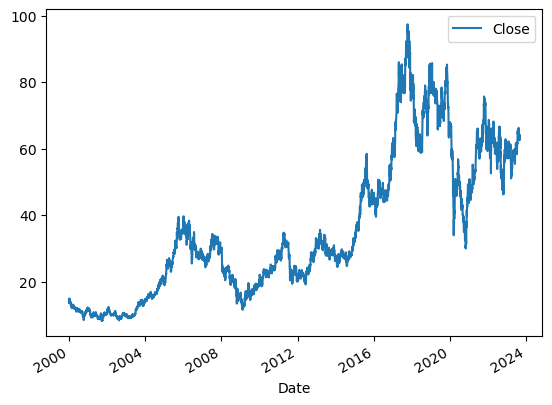

In [6]:
orlen.plot.line(y="Close", use_index=True)

In [8]:
del orlen["Dividends"]
del orlen["Stock Splits"]

In [9]:
orlen["Tomorrow"] = orlen["Close"].shift(-1)

In [10]:
orlen

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2000-01-03 00:00:00+01:00,14.531725,14.585747,14.153577,14.423683,365290,13.775425
2000-01-04 00:00:00+01:00,13.775425,14.045531,13.721403,13.775425,510454,13.667381
2000-01-05 00:00:00+01:00,13.613361,13.721403,13.613361,13.667381,732032,13.559342
2000-01-06 00:00:00+01:00,13.559342,13.991512,13.559342,13.559342,388866,14.585749
2000-01-07 00:00:00+01:00,14.477706,14.747812,14.369664,14.585749,454879,14.963897
...,...,...,...,...,...,...
2023-08-25 00:00:00+02:00,63.000000,63.599998,62.500000,62.560001,1413646,64.000000
2023-08-28 00:00:00+02:00,62.799999,64.089996,62.599998,64.000000,1079066,63.520000
2023-08-29 00:00:00+02:00,64.000000,64.150002,63.180000,63.520000,971842,63.580002


In [11]:
orlen["Target"] = (orlen["Tomorrow"] > orlen["Close"]).astype(int)

In [12]:
orlen

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00+01:00,14.531725,14.585747,14.153577,14.423683,365290,13.775425,0
2000-01-04 00:00:00+01:00,13.775425,14.045531,13.721403,13.775425,510454,13.667381,0
2000-01-05 00:00:00+01:00,13.613361,13.721403,13.613361,13.667381,732032,13.559342,0
2000-01-06 00:00:00+01:00,13.559342,13.991512,13.559342,13.559342,388866,14.585749,1
2000-01-07 00:00:00+01:00,14.477706,14.747812,14.369664,14.585749,454879,14.963897,1
...,...,...,...,...,...,...,...
2023-08-25 00:00:00+02:00,63.000000,63.599998,62.500000,62.560001,1413646,64.000000,1
2023-08-28 00:00:00+02:00,62.799999,64.089996,62.599998,64.000000,1079066,63.520000,0
2023-08-29 00:00:00+02:00,64.000000,64.150002,63.180000,63.520000,971842,63.580002,1


In [13]:
orlen = orlen.loc["2003-01-01":].copy()

In [14]:
orlen

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2003-01-01 00:00:00+01:00,9.678521,9.678521,9.678521,9.678521,0,9.678521,0
2003-01-02 00:00:00+01:00,9.760542,9.760542,9.596499,9.678521,240955,10.115968,1
2003-01-03 00:00:00+01:00,9.842563,10.143308,9.815223,10.115968,1329305,10.225329,1
2003-01-06 00:00:00+01:00,10.170648,10.225329,10.033946,10.225329,708266,10.225329,0
2003-01-07 00:00:00+01:00,10.197988,10.307351,10.033946,10.225329,611484,9.979268,0
...,...,...,...,...,...,...,...
2023-08-25 00:00:00+02:00,63.000000,63.599998,62.500000,62.560001,1413646,64.000000,1
2023-08-28 00:00:00+02:00,62.799999,64.089996,62.599998,64.000000,1079066,63.520000,0
2023-08-29 00:00:00+02:00,64.000000,64.150002,63.180000,63.520000,971842,63.580002,1


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = orlen.iloc[:-100]
test = orlen.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [17]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [18]:
precision_score(test["Target"], preds)

0.5641025641025641

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

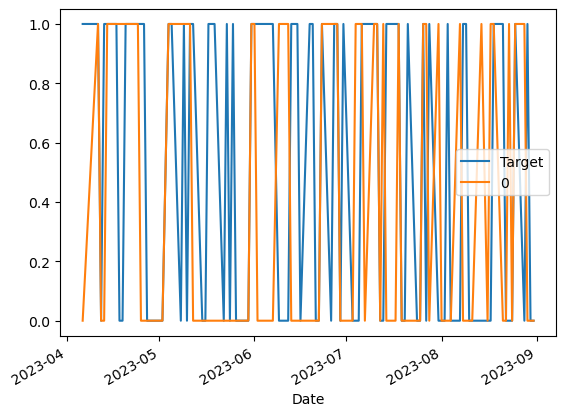

In [20]:
combined.plot()

In [21]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [22]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(orlen, model, predictors)

In [24]:
predictions["Predictions"].value_counts()

0    1602
1    1231
Name: Predictions, dtype: int64

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

0.479285134037368

In [26]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.518179
1    0.481821
Name: Target, dtype: float64

In [27]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = orlen.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    orlen[ratio_column] = orlen["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    orlen[trend_column] = orlen.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [29]:
orlen = orlen.dropna()

In [30]:
orlen

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2006-11-01 00:00:00+01:00,27.495726,27.495726,27.495726,27.495726,0,26.808338,0,1.000000,0.0,0.995107,1.0,0.958074,23.0,0.840652,114.0,1.247454,478.0
2006-11-02 00:00:00+01:00,27.226502,27.495732,26.539111,26.808338,910960,26.808338,0,0.987342,0.0,0.977852,0.0,0.936240,23.0,0.820423,113.0,1.215324,478.0
2006-11-03 00:00:00+01:00,26.980186,27.037470,26.579208,26.808338,747980,27.323885,1,1.000000,0.0,0.984020,0.0,0.938054,23.0,0.821155,113.0,1.214405,477.0
2006-11-06 00:00:00+01:00,26.951546,27.409808,26.951546,27.323885,821406,27.037466,0,1.009524,1.0,1.005057,1.0,0.957886,23.0,0.837552,114.0,1.236801,477.0
2006-11-07 00:00:00+01:00,27.495728,27.667576,26.985911,27.037466,1657820,27.031738,0,0.994731,1.0,0.997886,1.0,0.949784,23.0,0.829366,114.0,1.222906,477.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24 00:00:00+02:00,63.200001,64.260002,62.400002,63.660000,1812151,62.560001,0,0.996088,0.0,0.998620,2.0,1.026197,30.0,1.107011,123.0,1.117430,486.0
2023-08-25 00:00:00+02:00,63.000000,63.599998,62.500000,62.560001,1413646,64.000000,1,0.991285,0.0,0.981395,2.0,1.006536,30.0,1.087504,123.0,1.098404,485.0
2023-08-28 00:00:00+02:00,62.799999,64.089996,62.599998,64.000000,1079066,63.520000,0,1.011378,1.0,1.004111,2.0,1.027898,30.0,1.112153,123.0,1.123946,486.0


In [31]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
predictions = backtest(orlen, model, new_predictors)

In [34]:
predictions["Predictions"].value_counts()

0.0    1708
1.0     124
Name: Predictions, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5967741935483871